# Testing DeepER

### Import libraries

In [1]:
%matplotlib inline

import time
import os
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from keras.callbacks import EarlyStopping
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import matplotlib.pyplot as plt
import seaborn as sns
from deeper_model import build_model
from deeper_utils import preprocess_data

Using TensorFlow backend.


### Read the dataset

In [2]:
trainData, testData, valData, embeddingMatrix, wordsWithNoEmbeddings = preprocess_data(
    'Fodors_Zagats', baseDir = '.')

Printing out words with no embeddings in GloVe

In [3]:
for word in wordsWithNoEmbeddings:
    print(word)
print()
print("There are {} words with no embeddings in GloVe".format(len(wordsWithNoEmbeddings)))

petrossian
lespinasse
felidia
eril
bizou
bertolini
lutece
wollensky
hedgerose
matsuhisa
postrio
meatty
buzio
plumpjack
bistango
rondelli
seryna
yolie
manora
hillhurst
nozawa
ciboulette
fringale
menchanko
sanppo
tadich
vivande
oritalia
steuart
kintetsu
yujean
cachette
jiraffe
doidge
frijoleros
sushisay
maykadeh
mavalli
otabe
parioli
romanissimo
barbetta
lattanzi
sfuzzi
debevic
fornaio
follonico
zarela

There are 48 words with no embeddings in GloVe


Print embedding matrix shape

In [4]:
embeddingMatrix.shape

(2075, 300)

In [5]:
leftTableTrainData, rightTableTrainData, trainLabels = trainData
leftTableTestData, rightTableTestData, testLabels = testData
leftTableValData, rightTableValData, valLabels = valData

Print training set size

In [6]:
print(leftTableTrainData.shape)
print(rightTableTrainData.shape)

(567, 1000)
(567, 1000)


Print test set size

In [7]:
print(leftTableTestData.shape)
print(rightTableTestData.shape)

(189, 1000)
(189, 1000)


Print validation set size

In [8]:
print(leftTableValData.shape)
print(rightTableValData.shape)

(190, 1000)
(190, 1000)


### Build the DeepER model 

In [9]:
model = build_model(embeddingMatrix, denseUnits=64)
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1000)         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 1000)         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 1000, 300)    622500      input_1[0][0]                    
__________________________________________________________________________________________________
embedding_2 (Embeddin

### Plot DeepER architecture

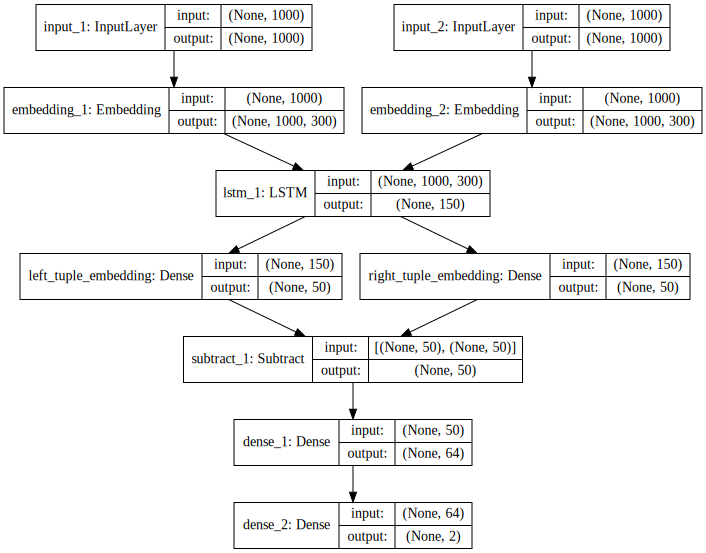

In [10]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

### Testing LSH
Build a new NN that given two inputs (a record from the left table and another one from the right table) outputs their corresponding embeddings.

In [12]:
from keras.models import Model

recordEmbeddingNN = Model(inputs=model.input, 
                          outputs= [model.get_layer("left_tuple_embedding").output, model.get_layer("right_tuple_embedding").output])

In [13]:
recordEmbeddingNN.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1000)         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 1000)         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 1000, 300)    622500      input_1[0][0]                    
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 1000, 300)    622500      input_2[0][0]                    
__________________________________________________________________________________________________
lstm_1 (LS

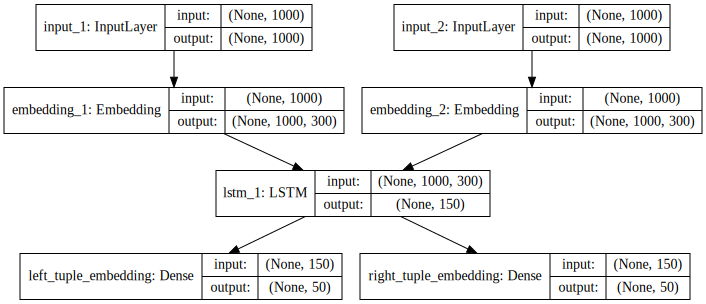

In [14]:
SVG(model_to_dot(recordEmbeddingNN, show_shapes=True).create(prog='dot', format='svg'))